In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nist_webbook_utils import generate_url, query_nist_webbook, parse_to_dataframe, get_nist_data

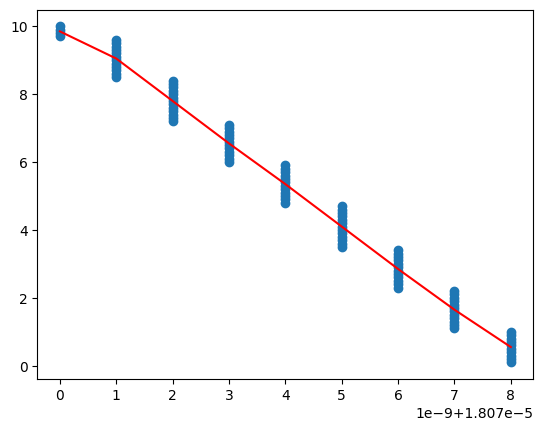

In [3]:
water_url = generate_url(
    substance_id="C7732185",  # CAS Registry Number for water (7732-18-5)
    temperature=300,  # Temperature in Kelvin
    p_low=0.1,  # Lower pressure in bar
    p_high=10.0,  # Upper pressure in bar
    p_increment=0.1,  # Pressure increment in bar
    digits=5
)
water_query = query_nist_webbook(water_url)
df = parse_to_dataframe(water_query)

# sns.scatterplot(data=df, x='Volume (m3/mol)', y='Pressure (bar)')

# Group by unique volume values and calculate the average pressure for each
processed_df = df.groupby('Volume (m3/mol)', as_index=False)['Pressure (bar)'].mean()

plt.plot(df['Volume (m3/mol)'], df['Pressure (bar)'], 'o', label='Data Points')
plt.plot(processed_df['Volume (m3/mol)'], processed_df['Pressure (bar)'], 'r-', label='Average Pressure')

Processes the DataFrame to create a new DataFrame with a single pressure value (e.g., the average pressure) for each distinct volume value.

In [19]:
Tc = 647  # Critical temperature for water in Kelvin
# Pc = 220.64  # Critical pressure for water in bar
h2o = get_nist_data(
    substance_id="C7732185",
    temperature=Tc * 1.1,
    p_low=10,
    p_high=4000,
    p_increment=10,
)

In [20]:
h2o["Z"] = (
    h2o["Pressure (bar)"] * 1e5
    * h2o["Volume (m3/mol)"]) / (
        8.314 * h2o["Temperature (K)"]
    )

In [21]:
h2o

,Temperature (K),Pressure (bar),Density (mol/m3),Volume (m3/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/bar),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase,Z
0,711.7,10.0,170.79,0.005855,54.438,60.293,136.660,29.736,38.568,645.79,0.632300,26.042,0.060011,vapor,0.989526
1,711.7,20.0,345.33,0.002896,54.255,60.046,130.640,30.171,39.564,642.20,0.631030,26.045,0.060991,vapor,0.978761
2,711.7,30.0,523.87,0.001909,54.067,59.793,127.000,30.628,40.631,638.52,0.629260,26.054,0.062015,vapor,0.967826
3,711.7,40.0,706.66,0.001415,53.874,59.535,124.340,31.106,41.772,634.75,0.627000,26.068,0.063085,vapor,0.956621
4,711.7,50.0,893.99,0.001119,53.677,59.270,122.200,31.605,42.992,630.90,0.624260,26.089,0.064206,vapor,0.945231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,711.7,3960.0,48198.00,0.000021,28.021,36.237,63.827,49.758,69.074,1794.50,-0.012809,120.640,0.799850,supercritical,1.388559
398,711.7,3970.0,48221.00,0.000021,28.013,36.246,63.810,49.761,69.054,1796.20,-0.012836,120.730,0.800620,supercritical,1.391395
399,711.7,3980.0,48245.00,0.000021,28.005,36.255,63.793,49.764,69.035,1797.90,-0.012862,120.830,0.801390,supercritical,1.394160
400,711.7,3990.0,48269.00,0.000021,27.997,36.264,63.777,49.767,69.015,1799.60,-0.012889,120.920,0.802150,supercritical,1.396988


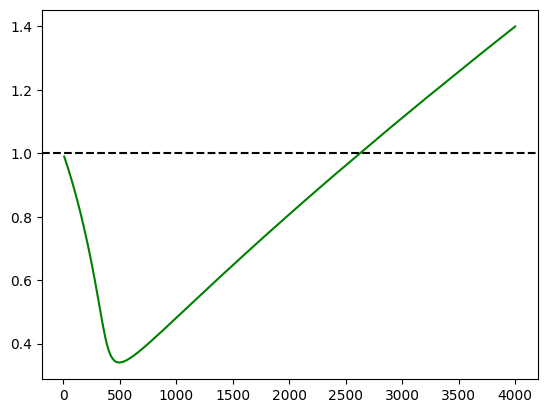

In [23]:
plt.plot(h2o['Pressure (bar)'], h2o['Z'], 'g-', label='Compressibility Factor')
plt.axhline(1, color='k', linestyle='--', label='Ideal Gas Line')

In [24]:
h2o.to_csv('water_compressibility.csv', index=False)